In [4]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting.textplot import linspace

Высчитываем k1, k2, k3, k4

In [23]:
# k = 4
def ode_4(f, g, t0, v0, y0, h):
    k1 = f(t0, v0, y0)
    m1 = g(t0, v0, y0)
    
    k2 = f(t0 + h/2, v0 + k1*h/2, y0 + m1*h/2)
    m2 = g(t0 + h/2, v0 + k1*h/2, y0 + m1*h/2)
    
    k3 = f(t0 + h/2, v0 + k2*h/2, y0 + m2*h/2)
    m3 = g(t0 + h/2, v0 + k2*h/2, y0 + m2*h/2)
    
    k4 = f(t0 + h, v0 + k3*h, y0 + m3*h)
    m4 = g(t0 + h, v0 + k3*h, y0 + m3*h)
    
    """print("\n", k1, k2, k3, k4, y0, "\n")"""
    v1 = v0 + h*(k1 + 2*k2 + 2*k3 + k4)/6
    y1 = y0 + h*(m1 + 2*m2 + 2*m3 + m4)/6
    t1 = t0 + h

    return (t1, v1, y1)

In [24]:
def ode4sys(f, g, a, v, y_f, N, h):
    T, V, Y = np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1)
    T[0], V[0], Y[0] = a, v, y_f
    for i in range(1, N + 1):
        T[i], V[i], Y[i] = ode_4(f, g, T[i-1], V[i-1], Y[i-1], h)
    
    return (T, V, Y)

Высчитываем теоретическое решение

In [31]:
y1, y2, x = symbols("y1, y2, x")

A, B, D = -5, 2, 1

 #Theoretical answer

C1 = -A/5 + B/2
C2 = A/5 + B/2

y1th = C2 * 5 * exp(x)/2 - C1 * 5 * exp(-199 * x)/2
y2th = C2 *exp(x) + C1 * exp(-199 * x)
Y1th = lambdify(x, y1th, "numpy")
Y2th = lambdify(x, y2th, "numpy")

In [32]:
 #Plotting

F = - 99 * y1 + 250 * y2
G = 40 * y1 - 99 * y2
f = lambdify([x, y1, y2], F, "numpy")
g = lambdify([x, y1, y2], G, "numpy")

y1f, y2f = A, B
a, b = 0, D
length = b - a
err = 1e-6
N = 1600

h = length / N

X, Y1, Y2 = ode4sys(f, g, a, y1f, y2f, N, h)
err_step = err * 2
X0, Y10, Y20 = X, Y1, Y2
"""
while(err_step >= err):
    N = 2 * N
    h = length / N
    X, Y1, Y2 = ode4sys(f, g, a, y1f, y2f, N, h)

    n_step = int(N / 10 / 2)
    
    err_set1 = [abs(Y10[j * n_step] - Y1[2 * j * n_step]) for j in range(11)]
    err_set2 = [abs(Y20[j * n_step] - Y2[2 * j * n_step]) for j in range(11)]
    #err_set1 = [abs(Y1[2 * j * n_step] - Y1th(D * j / 10)) for j in range(11)]
    #err_set2 = [abs(Y2[2 * j * n_step] - Y2th(D * j / 10)) for j in range(11)]
    
    print(f"Errors in {N}: {max(err_set1)}, {max(err_set2)}")
    err_step = max(max(err_set1), max(err_set2))
    X0, Y10, Y20 = X, Y1, Y2
"""
n_step = N / 10 / 2

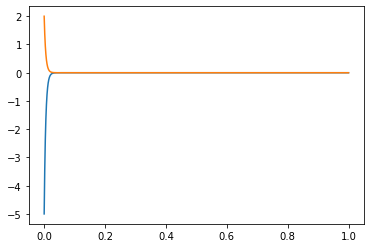

In [33]:
plt.plot(X, Y1)
plt.plot(X, Y2)

Численное решение

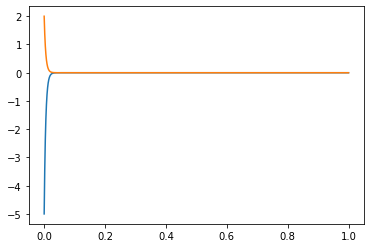

In [34]:
plt.plot(X, Y1th(np.linspace(0, D, N + 1)))
plt.plot(X, Y2th(np.linspace(0, D, N + 1)))

Теоретическое решение

Конечные выводы:

In [35]:
print(f"Количество сегментов N = {N}\n\n")
for i in range(11):
    print(f"X = {X[int(2 * i * n_step)]:.3f}\n")
    print("{:>2}Y1_th = {}\n".format("", Y1th(D * i / 10)))
    print("{:>2}Y1_ex = {}\n".format("", Y1[int(2 * i * n_step)]))
    print("{:>2}Diff1 = {}\n\n".format("", abs(Y1[int(2 * i * n_step)] - Y1th(D * i / 10))))

    print("{:>2}Y2_th = {}\n".format("", Y2th(D * i / 10)))
    print("{:>2}Y2_ex = {}\n".format("", Y2[int(2 * i * n_step)]))
    print("{:>2}Diff2 = {}\n\n".format("", abs(Y2[int(2 * i * n_step)] - Y2th(D * i / 10))))

Количество сегментов N = 1600


X = 0.000

  Y1_th = -5.0

  Y1_ex = -5.0

  Diff1 = 0.0


  Y2_th = 2.0

  Y2_ex = 2.0

  Diff2 = 0.0


X = 0.100

  Y1_th = -1.1389635206026814e-08

  Y1_ex = -1.1390136028067802e-08

  Diff1 = 5.008220409875953e-13


  Y2_th = 4.555854082410726e-09

  Y2_ex = 4.556054890398452e-09

  Diff2 = 2.0080798772614976e-13


X = 0.200

  Y1_th = -2.5944758025273094e-17

  Y1_ex = 6.360107334832778e-16

  Diff1 = 6.619554915085509e-16


  Y2_th = 1.0377903210109237e-17

  Y2_ex = 2.751619273745039e-16

  Diff2 = 2.6478402416439465e-16


X = 0.300

  Y1_th = -5.910026588330006e-26

  Y1_ex = 7.315764829256629e-16

  Diff1 = 7.315764829847632e-16


  Y2_th = 2.3640106353320025e-26

  Y2_ex = 2.926305932175516e-16

  Diff2 = 2.926305931939115e-16


X = 0.400

  Y1_th = -1.3462609379799455e-34

  Y1_ex = 8.085170533428325e-16

  Diff1 = 8.085170533428325e-16


  Y2_th = 5.385043751919782e-35

  Y2_ex = 3.23406821337133e-16

  Diff2 = 3.23406821337133e-16


X = 0.50